In [1]:
#  plot gridded IWP maps for various data products:
#   ERA5, MERRA, DARDAR, GPROF GMI, SpareICE, MODIS
#  started late 2017, worked on primarily early 2018.
#  some bug fixes and additions june 2018

#import h5py
from mpl_toolkits.basemap import Basemap, cm
import glob
#import numpy as np
#import matplotlib.pyplot as plt
#import os
#from os import listdir
#from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans

In [2]:
dir = '/home/dudavid/projects/iwp/grids/' 
yr = '15' #true for most...
#startlat = 70.0 # abs value of NS boundaries
#gsize = 1.0 #0.5 # grid size in degree
#nx, ny = int(360/gsize), int(startlat*2/gsize)

binz = [2**x for x in range(-14,5)]
print(binz)
print(len(binz))

#iwpg, iwpgc = np.zeros([ny,nx]), np.zeros([ny,nx]) # total,count
#iwpgb, iwpgcb= np.zeros([ny,nx]),np.zeros([ny,nx]) # total,count
#iwpall,lata,dna,dmask, iwpallb,iwpalls = [],[],[],[], [],[]

mi,ma = 1,400 ## vmin,vmax for global mean grid plots

[6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
19


In [3]:
# read in various numpy files output by makegrid_** routines
# (yearly files for most, monthly for dardar right now)

#merra first
gnx, gny = 720, 360
# if in doubt use the daytime a-train-centered data:
#merra.720x.360y.13.5_10.5to16.5_1hrly.iwp.v1.15.365.grid.npy
merra_iwp = np.load('grids/merra.720x.360y.13.5_10.5to16.5_1hrly.iwp.v1.15.365.grid.npy')
merra_iwp_z = np.load('grids/merra.720x.360y.13.5_10.5to16.5_1hrly.iwp.v1.15.365.zonal.npy')
dmerra_iwp = merra_iwp #np.load('grids/merra.day.720x.360y.6to18_3hrly.iwp.zi.hist.v1.15.365.grid.npy')
dmerra_iwp_z = merra_iwp_z #np.load('grids/merra.day.720x.360y.6to18_3hrly.iwp.zi.hist.v1.15.365.zonal.npy')
nmerra_iwp = np.load('grids/merra.720x.360y.1.5_-1.5to4.5_1hrly.iwp.v1.15.365.grid.npy')
nmerra_iwp_z = np.load('grids/merra.720x.360y.1.5_-1.5to4.5_1hrly.iwp.v1.15.365.zonal.npy')
#nmerra_iwp = np.load('grids/merra.night.720x.360y.18to6_3hrly.iwp.zi.hist.v1.15.365.grid.npy')
#nmerra_iwp_z = np.load('grids/merra.night.720x.360y.18to6_3hrly.iwp.zi.hist.v1.15.365.zonal.npy')
#fig2 = plt.figure(figsize=[11,5])
#grdmap(merra_iwp,-180,90,.001,0.6,1,'MERRA 20'+yr+' IWP mean')
#fig21 = plt.figure(figsize=[11,5])
#grdmap(np.flipud(dmerra_iwp)*1000,-180,-90,mi,ma,1,'MERRA 20'+yr+' IWP mean (day)',r'$IWP [g/m^2]$')
#fig21.savefig('img/merra.iw.2015.aday.v1.jpg',dpi=400) # 'aday' for atrain day (around 13.5LT)

#era5 next -- was used before switch to daytime/nighttime treated separately!
#gnx, gny = 720, 361
#efi = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v1.'+yr+'.365'
#efi = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.3hrly.iwp.swp.zi.hist.v1.'+yr+'.365'
#ec_iwp = np.load(efi+'.grid.npy')
#ec_swp = np.load(efi+'.sgrid.npy')
#ec_iwp_z = np.load(efi+'.zonal.npy')
#ec_swp_z = np.load(efi+'.szonal.npy')
#fig3 = plt.figure(figsize=[11,5])
#grdmap(ec_iwp,-180,90,.001,0.6,1,'ERA5 20'+yr+' IWP mean')
#fig31 = plt.figure(figsize=[11,5])
#grdmap(ec_swp,-180,90,.001,0.6,1,'ERA5 20'+yr+' SWP mean')
#fig32 = plt.figure(figsize=[11,5])
#grdmap(np.flipud(ec_swp+ec_iwp)*1000,-180,-90,mi,ma,1,'ERA5 IWP+SWP mean, daytime 20'+yr,r'$IWP [g/m^2]$')
#fig32.savefig('img/era5.sw+iw.2015.aday.v1.jpg',dpi=400) # 'aday' for atrain day (around 13.5LT)

#modis next
mnx, mny = 360, 180
efi = dir+'modis-aqua.'+str(mnx)+'x.'+str(mny)+'y.daily.iwp.zi.hist.v2.'+yr+'.365'
modis_iwp = np.load(efi+'.grid.npy')
modis_iwp_z = np.load(efi+'.zonal.npy')
#fig3 = plt.figure(figsize=[11,5])
#grdmap(np.flipud(modis_iwp)*1000,-180,-90,mi,ma,1,'Aqua-MODIS 20'+yr+' IWP mean',r'$IWP [g/m^2]$')
#fig3.savefig('img/modis-aqua.iw.2015.aday.v2.jpg',dpi=400) # 'aday' for atrain day (around 13.5LT)
print(info(modis_iwp*1000))

['7.77E-1', '3.42E+2', '7.40E+1', '3.61E+1']


In [4]:
gnx, gny = 720, 361
#eyr = '16' # if wanting to override 'yr' defined above
#efid = dir+'era5.day.'+str(gnx)+'x.'+str(gny)+'y.6to18_3hrly.iwp.swp.zi.hist.v1.'+yr+'.365'
efid = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.'+yr+'.365'
print(efid)
#era5.720x.361y.1.5_-1.5to4.5_3hrly.iwp.swp.v1.15.365.grid.npy
dec_iwp = np.load(efid+'.grid.npy')
dec_swp = np.load(efid+'.sgrid.npy')
dec_iwp_z = np.load(efid+'.zonal.npy')
dec_swp_z = np.load(efid+'.szonal.npy')
#efin = dir+'era5.night.'+str(gnx)+'x.'+str(gny)+'y.18to6_3hrly.iwp.swp.zi.hist.v1.'+yr+'.365'
efin = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.1.5_-1.5to4.5_3hrly.iwp.swp.v2.'+yr+'.365'
nec_iwp = np.load(efin+'.grid.npy')
nec_swp = np.load(efin+'.sgrid.npy')
nec_iwp_z = np.load(efin+'.zonal.npy')
nec_swp_z = np.load(efin+'.szonal.npy')
idif = 1000.0*(dec_iwp - nec_iwp)# / dec_swp
#fig32 = plt.figure(figsize=[13,6])
#grdmap(dec_swp,-180,90,.04,.3,1,'ERA5 20'+yr+' SWP day')
#fig33 = plt.figure(figsize=[13,6])
#grdmap(nec_swp,-180,90,.04,.3,1,'ERA5 20'+yr+' SWP night')
#fig37 = plt.figure(figsize=[13,6])
#grdmap(idif,-180,90,-20,20,2,'ERA5 20'+yr+' CIWP day-night')
sdif = 1000.0*(dec_swp - nec_swp)
psdif = 100.0*(dec_swp - nec_swp)/((dec_swp+nec_swp)*.5)
#fig38 = plt.figure(figsize=[13,6])
#grdmap(np.flipud(psdif),-180,-90,-90,90,2,'ERA5 20'+yr+' SWP day-night','% Difference')
#fig36 = plt.figure(figsize=[13,6])
#grdmap(np.flipud(idif+sdif),-180,-90,-100,100,2,'ERA5 20'+yr+' SWP+IWP day-night','Difference [g]')
#fig36.savefig('img/era5.dndif.20'+yr+'v1.jpg',dpi=400)
#fig39 = plt.figure(figsize=[13,6])
dif2 = 1000.0*(dmerra_iwp - nmerra_iwp)# / dmerra_iwp
#grdmap(dif2,-180,90,-10,10,2,'MERRA 20'+yr+' IWP day-night')


/home/dudavid/projects/iwp/grids/era5.720x.361y.13.5_10.5to16.5_3hrly.iwp.swp.v2.15.365


number dardar monthly files used:  68
['0.00E+2', '5.94E-1', '1.03E-1', '8.18E-2']
1.0 400.0 1


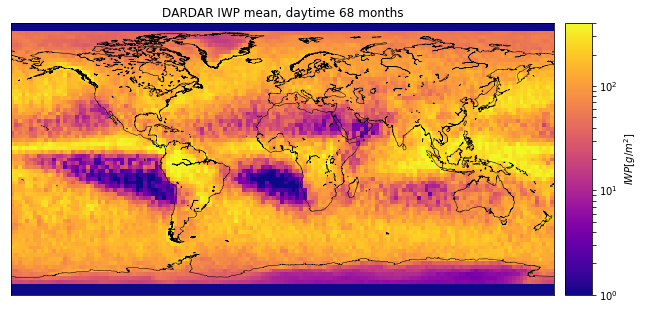

In [5]:
# read in x months of DARDAR data on 2.5deg grid
#dcts = sorted(glob.glob(dir+'dardar.144x.72y.iwptot.cts.hist.v1.15*.cts.npy'))
#dtot = sorted(glob.glob(dir+'dardar.144x.72y.iwptot.cts.hist.v1.15*.tot.npy'))
dcts = sorted(glob.glob(dir+'dardar.day.144x.72y.iwptot.cts.hist.v1.0*.cts.npy'))+sorted(glob.glob(dir+'dardar.144x.72y.iwptot.cts.hist.v1.*.cts.npy'))
dtot = sorted(glob.glob(dir+'dardar.day.144x.72y.iwptot.cts.hist.v1.0*.tot.npy'))+sorted(glob.glob(dir+'dardar.144x.72y.iwptot.cts.hist.v1.*.tot.npy'))
darcount = np.zeros([72,144])
dartots  = np.zeros([72,144])
#d1 = np.load('grids/dardar.144x.72y.iwptot.cts.hist.v1.1501.30.cts.npy')
#d2 = np.load('grids/dardar.144x.72y.iwptot.cts.hist.v1.1501.30.tot.npy')
#nonz = [d1 > 0]
#d3=np.zeros([72,144])
#d3[nonz] = d2[nonz]/d1[nonz]
#fig9 = plt.figure(figsize=[11,5])
#grdmap(np.flipud(d3),-180,90,0.001,2,1)
ndar = len(dcts)
print('number dardar monthly files used: ',ndar)
if ndar != len(dtot): print('unequal!')
for d in range(ndar):
    darcount += np.load(dcts[d])
    dartots  += np.load(dtot[d])
    
darmean = np.zeros([72,144])
nonz = [darcount > 0]
darmean[nonz] = dartots[nonz]/darcount[nonz]
print(info(darmean))
fig7 = plt.figure(figsize=[11,5])
grdmap((darmean)*1000,-180,-90,mi,ma,1,'DARDAR IWP mean, daytime '+str(ndar)+' months',r'$IWP [g/m^2]$')
#fig7.savefig('img/dardar.iw.'+str(ndar)+'months.day.v1.jpg',dpi=500) # 'aday' for atrain day (around 13.5LT)

# zonal means from mean of monthly grids:
dar_zonal = np.array(np.nanmean(darmean[:,:],axis=1))
#print(np.shape(dar_zonal))

In [6]:
# read in x months of SpareICE data on 2.5deg grid
scts = sorted(glob.glob(dir+'spare.144x.72y.iwptot.cts.hist.v1.*.cts.npy'))
stot = sorted(glob.glob(dir+'spare.144x.72y.iwptot.cts.hist.v1.*.tot.npy'))
sparecount = np.zeros([72,144])
sparetots  = np.zeros([72,144])
nspar = len(scts)
print('number spareice monthly files used: ',nspar)
if nspar != len(stot): print('unequal!')
for d in range(nspar):
    #print(scts[d],stot[d])
    sparecount += np.load(scts[d])
    sparetots  += np.load(stot[d])
    
sparemean = np.zeros([72,144])
nonz = [sparecount > 0]
sparemean[nonz] = sparetots[nonz]/sparecount[nonz]
#fig70 = plt.figure(figsize=[11,5])
#grdmap((sparemean*1000),-180,-90,mi,ma,1,'SpareICE IWP mean, daytime '+str(nspar)+' months',r'$IWP [g/m^2]$')
#fig70.savefig('img/spare.iw.'+str(nspar)+'months.day.v1.jpg',dpi=400) # 'aday' for atrain day (around 13.5LT)

# zonal means from mean of monthly grids:
spare_zonal = np.array(np.nanmean(sparemean[:,:],axis=1))
#print(np.shape(dar_zonal))

number spareice monthly files used:  12


number gprof monthly files used:  12
1.0 400.0 1


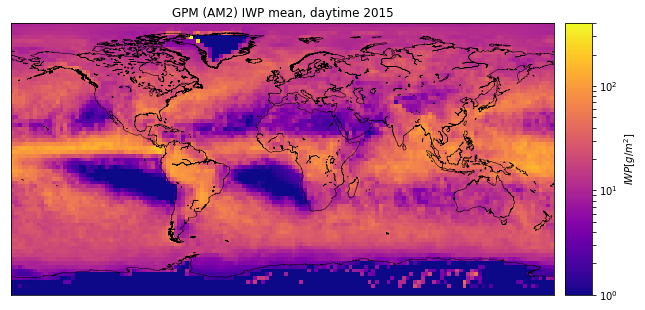

In [7]:
# read in x months of GPROF data on 2.5deg grid -- 2015 only, 'night' files have it in filename (day don't)
gcts = sorted(glob.glob(dir+'gprofAM2.144x.72y.iwptot.cts.hist.v1.15*.cts.npy'))
gtot = sorted(glob.glob(dir+'gprofAM2.144x.72y.iwptot.cts.hist.v1.15*.tot.npy'))
gprofcount = np.zeros([72,144])
gproftots  = np.zeros([72,144])
ngpr = len(gcts)
print('number gprof monthly files used: ',ngpr)
if ngpr != len(gtot): print('unequal!')
for d in range(ngpr):
    gprofcount += np.load(gcts[d])
    gproftots  += np.load(gtot[d])
    #print(d,info(np.load(gtot[d])))
    
gprofmean = np.zeros([72,144])
nonz = [gprofcount > 0]
gprofmean[nonz] = gproftots[nonz]/gprofcount[nonz]
fig17 = plt.figure(figsize=[11,5])
grdmap((gprofmean*1000),-180,-90,mi,ma,1,'GPM (AM2) IWP mean, daytime 2015',r'$IWP [g/m^2]$')
fig17.savefig('img/gpm-am2.iw.'+str(ngpr)+'months.day.v1.jpg',dpi=400) # 'aday' for atrain day (around 13.5LT)

# zonal means from mean of monthly grids:
gprof_zonal = np.array(np.nanmean(gprofmean[:,:],axis=1))
#print(np.shape(dar_zonal))

In [8]:
# setup for plotting, interpolate era5 to match merra grid
latmax = 90
ny = 360
zax = np.linspace(-1*latmax,latmax,ny)
#zaxm= np.linspace(-1*latmax,latmax,180)
zaxm= np.linspace(-1*60,60,60*2)
zaxd= np.linspace(-60,60,int(120/2.5)) # avoid 3 on each end, no DAR above 80ish
# interpolate ERA5 to midpoints to match MERRA grid (?)
inz = [z+.5 for z in range(360)]
#ec_iwp_z2 = np.interp(inz,range(361),ec_iwp_z)
#ec_swp_z2 = np.interp(inz,range(361),ec_swp_z)
dec_iwp_z2 = np.interp(inz,range(361),dec_iwp_z)
dec_swp_z2 = np.interp(inz,range(361),dec_swp_z)

In [9]:
# lat weight and calculate 'global' means of each dataset: a single number!
#  cosine weighting based on latitude middle of each gridbox
sixtys = [math.cos(math.radians(x)) for x in np.linspace(-59.75,59.75,60*2*2)]
merramean = str(round(1000*np.sum(dmerra_iwp_z[60:300]*sixtys)/np.sum(sixtys),1))
era5cmean = str(round(1000*np.sum(dec_iwp_z2[60:300]*sixtys)/np.sum(sixtys),1))
era5tmean = str(round(1000*np.sum(dec_iwp_z2[60:300]*sixtys+dec_swp_z2[60:300]*sixtys)/np.sum(sixtys),1))
sixtysm = [math.cos(math.radians(x)) for x in np.linspace(-59.5,59.5,60*2)]
modismean = str(round(1000*np.sum(modis_iwp_z[30:150]*sixtysm)/np.sum(sixtysm),1))
sixtysd = [math.cos(math.radians(x)) for x in np.linspace(-58.75,58.75,int(120/2.5))]
dargmean = str(round(1000*np.sum(dar_zonal[12:60]*sixtysd)/np.sum(sixtysd),1))
sparegmean = str(round(1000*np.sum(spare_zonal[12:60]*sixtysd)/np.sum(sixtysd),1))
gprofgmean = str(round(1000*np.sum(gprof_zonal[12:60]*sixtysd)/np.sum(sixtysd),1))
print('merra gmean: ',merramean)#*1000)
print('era5c gmean: ',era5cmean)#*1000)
#print('ratio of ^',merramean/era5cmean)
print('era5t gmean: ',era5tmean)#*1000)
print('modis gmean: ',modismean)#*1000)
print('dardar gmean: ',dargmean)#*1000)
print('spare gmean: ',sparegmean)#*1000)
print('gprof gmean: ',gprofgmean)#*1000)

merra gmean:  17.0
era5c gmean:  21.7
era5t gmean:  67.1
modis gmean:  44.6
dardar gmean:  126.8
spare gmean:  97.2
gprof gmean:  29.4


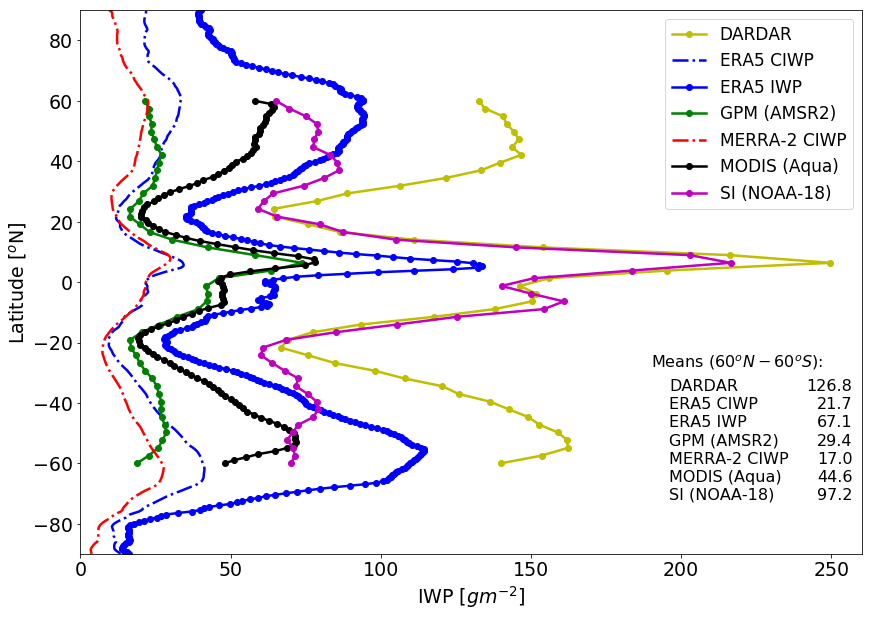

In [14]:
figz = plt.figure(figsize=[14,10])
#print('ecswp: ',ec_swp_z2)
#print('decswp: ',dec_swp_z2)
#plt.plot(1000*ec_iwp_z2[::-1],zax,'b--',label='ERA5 CIWP')
#plt.plot(1000*ec_swp_z2[::-1],zax,'b--',label='ERA5 SWP')
#plt.plot((ec_swp_z2[::-1]+ec_iwp_z2[::-1]),zax,'g-o',label='ERA5 CIWP+SWP')
#plt.plot(1000*merra_iwp_z[::-1],zax,'r--',label='MERRA IWP')
#plt.plot(1000*(dec_swp_z2[::-1]),zax,'b-o',label='ERA5 SWP (day)')
lw = 2.5
#plt.plot(1000*dar_zonal[12:60],zaxd,'y-o',      label='DARDAR     = 126.8',linewidth=lw)
#plt.plot(1000*dec_iwp_z2[::-1],zax,'b-.',       label='ERA5 CIWP  = 21.7',linewidth=lw)
#plt.plot(1000*(dec_swp_z2[::-1]+dec_iwp_z2[::-1]),zax,'b-o',label='ERA5 IWP   = 67.1',linewidth=lw)# (day)')
#plt.plot(1000*gprof_zonal[12:60],zaxd,'g-o',    label='GPM-AMSR2  = 29.4',linewidth=lw)
#plt.plot(1000*dmerra_iwp_z[::-1],zax,'r-.',     label='MERRA CIWP = 17.0',linewidth=lw)# (day)')
#plt.plot(1000*modis_iwp_z[150:30:-1],zaxm,'k-o',label='MODIS      = 44.6',linewidth=lw)
#plt.plot(1000*spare_zonal[12:60],zaxd,'m-o',    label='SI         = 97.2',linewidth=lw)
plt.plot(1000*dar_zonal[12:60],zaxd,'y-o',      label='DARDAR',linewidth=lw)
plt.plot(1000*dec_iwp_z2[::-1],zax,'b-.',       label='ERA5 CIWP',linewidth=lw)
plt.plot(1000*(dec_swp_z2[::-1]+dec_iwp_z2[::-1]),zax,'b-o',label='ERA5 IWP',linewidth=lw)# (day)')
plt.plot(1000*gprof_zonal[12:60],zaxd,'g-o',    label='GPM (AMSR2)',linewidth=lw)
plt.plot(1000*dmerra_iwp_z[::-1],zax,'r-.',     label='MERRA-2 CIWP',linewidth=lw)# (day)')
plt.plot(1000*modis_iwp_z[150:30:-1],zaxm,'k-o',label='MODIS (Aqua)',linewidth=lw)
plt.plot(1000*spare_zonal[12:60],zaxd,'m-o',    label='SI (NOAA-18)',linewidth=lw)
plt.xlabel(r'IWP $[g m^{-2}]$',fontsize=19)
plt.ylabel(r'Latitude $[^o$N]',fontsize=19)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
axes = plt.gca()
axes.set_ylim([-90,90])
axes.set_xlim([0,260])
axes.text(190, -28, r"Means ($60^oN-60^oS$):",fontsize=16)
setz = ["DARDAR","ERA5 CIWP","ERA5 IWP","GPM (AMSR2)","MERRA-2 CIWP","MODIS (Aqua)","SI (NOAA-18)"]
#setzv = ["126.8","21.7","67.1","29.4","17.0","44.6","97.2"] #  #s come from below cell, rounded
setzv = [dargmean,era5cmean,era5tmean,gprofgmean,merramean,modismean,sparegmean]
for y in range(7):
    axes.text(196,-36-y*6, setz[y],fontsize=16)
for y in range(7):
    axes.text(257,-36-y*6, setzv[y],fontsize=16,horizontalalignment='right')
#plt.title('IWP 20'+yr+' zonal means')
plt.legend(fontsize=17)
plt.show()
figz.savefig('img/20'+yr+'_aday_zonal_v6.eps',bbox_inches='tight')#,dpi=400)

In [11]:
stappppp
# same as above but flipped 90deg
#figz = plt.figure(figsize=[14,10])
#lw = 2.5
#plt.plot(zaxd[::-1],1000*dar_zonal[60:12:-1],'y-o',label='DARDAR',linewidth=lw)
#plt.plot(zax[::-1],1000*dec_iwp_z2[::],'b-.',label='ERA5 CIWP',linewidth=lw)
#plt.plot(zax[::-1],1000*(dec_swp_z2[::]+dec_iwp_z2[::-1]),'b-o',label='ERA5 CIWP+SWP',linewidth=lw)# (day)')
#plt.plot(zaxd[::-1],1000*gprof_zonal[60:12:-1],'g-o',label='GPM-AMSR2',linewidth=lw)
#plt.plot(zax[::-1],1000*dmerra_iwp_z[::],'r-.',label='MERRA CIWP',linewidth=lw)# (day)')
#plt.plot(zaxm[::-1],1000*modis_iwp_z[30:150],'k-o',label='MODIS (Aqua)',linewidth=lw)
#plt.plot(zaxd[::-1],1000*spare_zonal[60:12:-1],'m-o',label='SpareICE',linewidth=lw)
#plt.ylabel(r'IWP $[g/m^2]$',fontsize=16)
#plt.xlabel(r'Latitude $[^oN]$',fontsize=16)
#plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
#axes = plt.gca()
#axes.set_xlim([90,-90])
#axes.set_ylim([0,260])
##plt.title('IWP 20'+yr+' zonal means')
#plt.legend(fontsize=14)
#plt.show()
##figz.savefig('img/all.20'+yr+'.aday.zonal.v3v.jpg',dpi=400)

NameError: name 'stappppp' is not defined

In [ ]:
# to satisfy reviewer, interannual variability of ERA5 IWP from zonal perspective:
# currently have 2013-2016 era5 iwp data
 
efid = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.10.365'
dec_iwp_2010 = np.load(efid+'.zonal.npy')
dec_swp_2010 = np.load(efid+'.szonal.npy')
dec_iwp_z2010 = np.interp(inz,range(361),dec_iwp_2010)
dec_swp_z2010 = np.interp(inz,range(361),dec_swp_2010)
efid = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.11.365'
dec_iwp_2011 = np.load(efid+'.zonal.npy')
dec_swp_2011 = np.load(efid+'.szonal.npy')
dec_iwp_z2011 = np.interp(inz,range(361),dec_iwp_2011)
dec_swp_z2011 = np.interp(inz,range(361),dec_swp_2011)
efid = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.12.366'
dec_iwp_2012 = np.load(efid+'.zonal.npy')
dec_swp_2012 = np.load(efid+'.szonal.npy')
dec_iwp_z2012 = np.interp(inz,range(361),dec_iwp_2012)
dec_swp_z2012 = np.interp(inz,range(361),dec_swp_2012)
efid = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.13.365'
dec_iwp_2013 = np.load(efid+'.zonal.npy')
dec_swp_2013 = np.load(efid+'.szonal.npy')
dec_iwp_z2013 = np.interp(inz,range(361),dec_iwp_2013)
dec_swp_z2013 = np.interp(inz,range(361),dec_swp_2013)
efid = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.14.365'
dec_iwp_2014 = np.load(efid+'.zonal.npy')
dec_swp_2014 = np.load(efid+'.szonal.npy')
dec_iwp_z2014 = np.interp(inz,range(361),dec_iwp_2014)
dec_swp_z2014 = np.interp(inz,range(361),dec_swp_2014)
efid = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.15.365'
dec_iwp_2015 = np.load(efid+'.zonal.npy')
dec_swp_2015 = np.load(efid+'.szonal.npy')
dec_iwp_z2015 = np.interp(inz,range(361),dec_iwp_2015)
dec_swp_z2015 = np.interp(inz,range(361),dec_swp_2015)
efid = dir+'era5.'+str(gnx)+'x.'+str(gny)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.16.366'
dec_iwp_2016 = np.load(efid+'.zonal.npy')
dec_swp_2016 = np.load(efid+'.szonal.npy')
dec_iwp_z2016 = np.interp(inz,range(361),dec_iwp_2016)
dec_swp_z2016 = np.interp(inz,range(361),dec_swp_2016)

figze = plt.figure(figsize=[12,10])
lw = 1.5
plt.plot(1000*(dec_swp_z2010[::-1]+dec_iwp_z2010[::-1]),zax,'g-',label='2010',linewidth=lw)
plt.plot(1000*(dec_swp_z2011[::-1]+dec_iwp_z2011[::-1]),zax,'m-',label='2011',linewidth=lw)
plt.plot(1000*(dec_swp_z2012[::-1]+dec_iwp_z2012[::-1]),zax,'c-',label='2012',linewidth=lw)
plt.plot(1000*(dec_swp_z2013[::-1]+dec_iwp_z2013[::-1]),zax,'b-',label='2013',linewidth=lw)
plt.plot(1000*(dec_swp_z2014[::-1]+dec_iwp_z2014[::-1]),zax,'r-',label='2014',linewidth=lw)
plt.plot(1000*(dec_swp_z2015[::-1]+dec_iwp_z2015[::-1]),zax,'k-',label='2015',linewidth=lw)
plt.plot(1000*(dec_swp_z2016[::-1]+dec_iwp_z2016[::-1]),zax,'y-',label='2016',linewidth=lw)
plt.xlabel(r'ERA5 Daytime IWP $[g m^{-2}]$',fontsize=16)
plt.ylabel(r'Latitude $[^o$N]',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes = plt.gca()
axes.set_ylim([-90,90])
axes.set_xlim([0,260])
plt.legend(fontsize=15)
plt.show()
figze.savefig('img/era5_daytime_zonal_7yrs.eps',bbox_inches='tight')#,dpi=400)

In [ ]:
# multipanel plot using subplots: 
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# fields plotted: np.flipud(ec_swp+ec_iwp)*1000, darmean*1000

ns = 60 # 65?
lamin,lomin = -ns,-180
dres,eres,mores = 2.5,0.5,1.0
fs = 15
dms=[-90,0,90]
dps=[-30,0,30]
ys, xs = np.shape(darmean[int((90-ns)/dres):int((90+ns)/dres),:]) # grid size for lat and lon, 2.5deg
lons, lats = np.linspace(lomin,abs(lomin),xs), np.linspace(lamin,abs(lamin),ys)
#print(np.shape(ec_swp),np.shape(dmerra_iwp))
eys, exs = np.shape(dec_swp[int((90-ns)/eres):int((90+ns)/eres),:]) # grid size for lat and lon, 0.5deg
moys, moxs = np.shape(modis_iwp[int((90-ns)/mores):int((90+ns)/mores),:]) # grid size for lat and lon, 0.5deg
elons,elats = np.linspace(lomin,abs(lomin),exs),np.linspace(lamin,abs(lamin),eys)
#mys, mxs = np.shape(dmerra_iwp[:,:]) # grid size for lat and lon
#melons,melats = np.linspace(lomin,abs(lomin),exs),np.linspace(lamin,abs(lamin),eys-1) #slightly different grid
molons,molats = np.linspace(lomin,abs(lomin),moxs),np.linspace(lamin,abs(lamin),moys) #slightly different grid

fig,ax = plt.subplots(nrows=3, ncols=2, figsize=[15,9]) #width,height
plt.subplots_adjust(wspace=0.05)
    
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[0,0])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
x, y = m(lons, lats)
m.pcolormesh(x,y, darmean[int((90-ns)/dres):int((90+ns)/dres),:]*1000, \
             norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('magma'), latlon=True)
ax[0,0].set_title('DARDAR',fontsize=fs)
ax[0,1].set_title('ERA5 Reanalysis',fontsize=fs)
ax[1,0].set_title('GPM (AMSR2)',fontsize=fs)
ax[1,1].set_title('MERRA-2 Reanalysis',fontsize=fs)
ax[2,0].set_title('MODIS (Aqua)',fontsize=fs)
ax[2,1].set_title('SI (NOAA-18)',fontsize=fs)
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[0,1])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
ex, ey = m(elons, elats)
m.pcolormesh(ex,ey, np.flipud(dec_swp[int((90-ns)/eres):int((90+ns)/eres),:]+dec_iwp[int((90-ns)/eres):int((90+ns)/eres),:])*1000, \
             norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('magma'), latlon=True)
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[1,0])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
m.pcolormesh(x,y, gprofmean[int((90-ns)/dres):int((90+ns)/dres),:]*1000, \
             norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('magma'), latlon=True)
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[1,1])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
#mex, mey = m(melons, melats)
m.pcolormesh(ex,ey, np.flipud(dmerra_iwp[int((90-ns)/eres):int((90+ns)/eres),:])*1000, \
             norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('magma'), latlon=True)
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[2,0])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
mox, moy = m(molons, molats)
m.pcolormesh(mox,moy, np.flipud(modis_iwp[int((90-ns)/mores):int((90+ns)/mores),:])*1000, \
             norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('magma'), latlon=True)
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[2,1])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
m.pcolormesh(x,y, sparemean[int((90-ns)/dres):int((90+ns)/dres),:]*1000, \
             norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('magma'), latlon=True)
cax = fig.add_axes([0.22, 0.07, 0.6, 0.03])
#cax = fig.add_axes([0.95, 0.2, 0.03, 0.6]) #works for vertical...
im = ax[2,1].imshow([[1, 2], [2, 3]], norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('magma'))
cb = plt.colorbar(im, cax=cax, norm=colors.LogNorm(vmin=mi,vmax=ma), \
                  cmap=plt.get_cmap('magma'),orientation='horizontal')
#cb = plt.colorbar(im, cax=cax, norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('magma'),orientation='vertical')
cb.set_label(r'IWP [$g m^{-2}]$',fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.show()
#fig.savefig('img/iwpgmean_all_v4.eps',bbox_inches='tight')
fig.savefig('img/iwpgmean_all_v4.png',dpi=300,bbox_inches='tight')

In [ ]:
#  examine diurnal variations between the datasets that are day and night (not spareice, modis)
import scipy.ndimage as ndimage

In [ ]:
# read in day and night DARDAR data from 08/09 (before day only ops began)
ndcts = sorted(glob.glob(dir+'dardar.night.144x.72y.iwptot.cts.hist.v1.0*.cts.npy'))
ndtot = sorted(glob.glob(dir+'dardar.night.144x.72y.iwptot.cts.hist.v1.0*.tot.npy'))
ddcts = sorted(glob.glob(dir+'dardar.day.144x.72y.iwptot.cts.hist.v1.0*.cts.npy'))
ddtot = sorted(glob.glob(dir+'dardar.day.144x.72y.iwptot.cts.hist.v1.0*.tot.npy'))
ndarcount, ndartots = np.zeros([72,144]), np.zeros([72,144])
ddarcount, ddartots = np.zeros([72,144]), np.zeros([72,144])
nndar, nddar = len(ddcts), len(ndcts)
print('number day dardar monthly files used: ',nddar)
print('number night dardar monthly files used: ',nndar)
if nddar != len(ndtot) or nndar != len(ddtot): print('unequal!')
for d in range(nddar):
    ddarcount += np.load(ddcts[d])
    ddartots  += np.load(ddtot[d])
    #ndartots  += np.load(ndtot[d])  #some bug with two monthly nighttime files
    ndarc = np.load(ndcts[d])
    ndart = np.load(ndtot[d])
    ndart[ndart > 1e6] = 0
    ndarc[ndart > 1e6] = 0
    ndarcount += ndarc #np.load(ndcts[d])
    ndartots += ndart #np.load(ndcts[d])
    #print(np.max(ndarcount),d)
    
ddarmean, ndarmean = np.zeros([72,144]), np.zeros([72,144])
dnonz = [ddarcount > 0]
nnonz = [ndarcount > 0]
ddarmean[dnonz] = ddartots[dnonz]/ddarcount[dnonz]
ndarmean[nnonz] = ndartots[nnonz]/ndarcount[nnonz]
#print(info(ndarmean[12:60,:]),info(ddarmean[12:60,:]))
#fig27 = plt.figure(figsize=[13,6])
#grdmap(np.flipud(ndarmean[12:60,:]),-180,60,.001,.6,1,'DARDAR IWP 08/09 night')
sg = 2
imd = 1000*(ddarmean)
imd = ndimage.gaussian_filter(imd, sigma=(sg,sg), order=0)
imn = 1000*(ndarmean)
imn = ndimage.gaussian_filter(imn, sigma=(sg,sg), order=0)
#fig8 = plt.figure(figsize=[13,6])
#grdmap(imd,-180,90,1,600,1,'DARDAR IWP 08/09 day (smoo)','IWP [g]')
#fig9 = plt.figure(figsize=[13,6])
#grdmap(imn,-180,90,1,600,1,'DARDAR IWP 08/09 night (smoo)','IWP [g]')
fig10 = plt.figure(figsize=[13,6])
grdmap(((imd[12:60,:]-imn[12:60,:])/(.5*imn[12:60,:]+.5*imd[12:60]))*100, \
        -180,-60,-60,60,2,'DARDAR IWP 08/09 day-night','Percent Difference')
fig10.savefig('img/dardar.daynightdif.'+str(nndar)+'.'+str(sg)+'smoo.v1.jpg',dpi=400)
#fig11 = plt.figure(figsize=[13,6])
#grdmap((imd-imn),-180,90,-50,50,2,'DARDAR IWP 08/09 day-night','IWP diff [g]')

# zonal means from mean of monthly grids:
ndar_zonal = np.array(np.nanmean(ndarmean[:,:],axis=1))
ddar_zonal = np.array(np.nanmean(ddarmean[:,:],axis=1))
dar_zonal_dndif = 1000*(ddar_zonal-ndar_zonal)


In [ ]:
# read in x months of GPROF data on 2.5deg grid
ngcts = sorted(glob.glob(dir+'gprofAM2.night.144x.72y.iwptot.cts.hist.v1.*.cts.npy'))
ngtot = sorted(glob.glob(dir+'gprofAM2.night.144x.72y.iwptot.cts.hist.v1.*.tot.npy'))
ngprofcount,ngproftots = np.zeros([72,144]), np.zeros([72,144])
nngpr = len(gcts)
print('number gprof monthly files used: ',nngpr)
for d in range(nngpr):
    ngprofcount += np.load(ngcts[d])
    ngproftots  += np.load(ngtot[d])
    #print(d,info(np.load(gtot[d])))
    
ngprofmean = np.zeros([72,144])
nnonz = [ngprofcount > 0]
ngprofmean[nnonz] = ngproftots[nnonz]/ngprofcount[nnonz]

#print(info(ngprofmean[10:62,:]),info(gprofmean[10:62]))
gimn = 1000*(ngprofmean)
gimn = ndimage.gaussian_filter(gimn, sigma=(sg,sg), order=0)
gimd = 1000*(gprofmean)
gimd = ndimage.gaussian_filter(gimd, sigma=(sg,sg), order=0)
fig11 = plt.figure(figsize=[13,6])
grdmap(((gimd[12:60,:]-gimn[12:60,:])/(.5*gimd[12:60,:]+.5*gimn[12:60,:]))*100,\
       -180,-60,-60,60,2,'GPM (AM2) IWP 2015 day-night','Percent Difference')
fig11.savefig('img/gpm-am2.daynightdif.'+str(nngpr)+'.'+str(sg)+'smoo.v1.jpg',dpi=400)
#fig19 = plt.figure(figsize=[13,6])
#grdmap((gimd-gimn),-180,90,-20,20,2,'GPROF AM2 2015 day-night','IWP diff [g]')

In [ ]:
# NOW (3/1) using model data centered on A-Train obs (130/1330)
ony=361
efid = dir+'era5.'+str(onx)+'x.'+str(ony)+'y.13.5_10.5to16.5_3hrly.iwp.swp.v2.'+yr+'.365'
dec_iwp = np.load(efid+'.grid.npy')
dec_swp = np.load(efid+'.sgrid.npy')
efin = dir+'era5.'+str(onx)+'x.'+str(ony)+'y.1.5_-1.5to4.5_3hrly.iwp.swp.v2.'+yr+'.365'
nec_iwp = np.load(efin+'.grid.npy')
nec_swp = np.load(efin+'.sgrid.npy')
ony=360
mfid = dir+'merra.'+str(onx)+'x.'+str(ony)+'y.13.5_10.5to16.5_1hrly.iwp.v1.'+yr+'.365'
dmerra_iwp = np.load(mfid+'.grid.npy')
mfin = dir+'merra.'+str(onx)+'x.'+str(ony)+'y.1.5_-1.5to4.5_1hrly.iwp.v1.'+yr+'.365'
nmerra_iwp = np.load(mfin+'.grid.npy')

sg = 4 # higher res data...

eimn, eimd = 1000*(nec_iwp+nec_swp), 1000*(dec_iwp+dec_swp)
eimn, eimd = ndimage.gaussian_filter(eimn,sigma=(sg,sg),order=0), ndimage.gaussian_filter(eimd,sigma=(sg,sg),order=0)
mimn, mimd = 1000*(nmerra_iwp), 1000*(dmerra_iwp)
mimn, mimd = ndimage.gaussian_filter(mimn,sigma=(sg,sg),order=0), ndimage.gaussian_filter(mimd,sigma=(sg,sg),order=0)
#fig18 = plt.figure(figsize=[13,6])
#grdmap(np.flipud((eimd-eimn)/(.5*eimn+.5*eimd))*100,-180,-90,-60,60,2,'ERA5 SWP+IWP 2015 day-night','Percent difference')
#fig18.savefig('img/era5.daynightdif.pct.20'+yr+'.'+str(sg)+'smoo.v1.jpg',dpi=400)
#fig19 = plt.figure(figsize=[13,6])
#grdmap(np.flipud(eimd-eimn),-180,-90,-40,40,2,'ERA5 SWP+IWP 2015 day-night','IWP diff [g]')
#fig19.savefig('img/era5.daynightdif.g.20'+yr+'.'+str(sg)+'smoo.v1.jpg',dpi=400)

#fig28 = plt.figure(figsize=[13,6])
#grdmap(np.flipud((mimd-mimn)/mimn)*100,-180,-90,-60,60,2,'MERRA IWP 2015 day-night','Percent difference')
#fig28.savefig('img/merra.daynightdif.pct.20'+yr+'.'+str(sg)+'smoo.v1.jpg',dpi=400)
#fig29 = plt.figure(figsize=[13,6])
#grdmap((mimd-mimn),-180,90,-20,20,2,'MERRA IWP 2015 day-night','IWP diff [g]')

In [ ]:
# multipanel plot for day/night differences
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=[12,5.5]) #width,height
plt.subplots_adjust(wspace=0.05)
mi,ma = -50,50

dardif = (imd[int((90-ns)/dres):int((90+ns)/dres),:]-imn[int((90-ns)/dres):int((90+ns)/dres),:])/ \
         (.5*imn[int((90-ns)/dres):int((90+ns)/dres),:]+.5*imd[int((90-ns)/dres):int((90+ns)/dres),:])*100
gpmdif = (gimd[int((90-ns)/dres):int((90+ns)/dres),:]-gimn[int((90-ns)/dres):int((90+ns)/dres),:])/ \
          (.5*gimd[int((90-ns)/dres):int((90+ns)/dres),:]+.5*gimn[int((90-ns)/dres):int((90+ns)/dres),:])*100
eradif = np.flipud((eimd[int((90-ns)/eres):int((90+ns)/eres),:]-eimn[int((90-ns)/eres):int((90+ns)/eres),:])/ \
                   (.5*eimn[int((90-ns)/eres):int((90+ns)/eres),:]+.5*eimd[int((90-ns)/eres):int((90+ns)/eres),:]))*100
merdif = np.flipud((mimd[int((90-ns)/eres):int((90+ns)/eres),:]-mimn[int((90-ns)/eres):int((90+ns)/eres),:])/ \
                   (.5*mimn[int((90-ns)/eres):int((90+ns)/eres),:]+.5*mimd[int((90-ns)/eres):int((90+ns)/eres),:]))*100
    
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[0,0])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
x, y = m(lons, lats)
m.pcolormesh(x,y, dardif, vmin=mi,vmax=ma, cmap=cm.coolwarm, latlon=True)
ax[0,0].set_title('DARDAR')
ax[0,1].set_title('ERA5')
ax[1,0].set_title('GPM (AMSR2)')
ax[1,1].set_title('MERRA-2')

m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[0,1])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
#ex, ey = m(elons, elats)
m.pcolormesh(ex,ey, eradif, vmin=mi,vmax=ma, cmap=cm.coolwarm, latlon=True)
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[1,0])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
m.pcolormesh(x,y, gpmdif, vmin=mi,vmax=ma, cmap=cm.coolwarm, latlon=True)
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[1,1])
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(dms,linewidth=.5),m.drawparallels(dps,linewidth=.5)
#mex, mey = m(melons, melats)
m.pcolormesh(ex,ey, merdif, vmin=mi,vmax=ma, cmap=cm.coolwarm, latlon=True)
cax = fig.add_axes([0.215, 0.08, 0.6, 0.03])
#cax = fig.add_axes([0.95, 0.2, 0.03, 0.6]) #works for vertical...
im = ax[1,1].imshow([[1, 2], [2, 3]], vmin=mi,vmax=ma, cmap=cm.coolwarm)
cb = plt.colorbar(im, cax=cax, cmap=cm.coolwarm, orientation='horizontal')
#cb = plt.colorbar(im, cax=cax, norm=colors.LogNorm(vmin=mi,vmax=ma), cmap=plt.get_cmap('plasma'),orientation='vertical')
cb.set_label('IWP Day-Night [% difference]')
plt.show()
fig.savefig('img/daynightdif.all.v3.png',bbox_inches='tight',dpi=300)